# EDA

In [2]:
import pandas as pd
import duckdb as db
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# pd.set_option('plotting.backend', 'plotly')

In [3]:
df=pd.read_csv('../../data/raw/TRAIN.csv', parse_dates=['Date'])
df.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,Orders,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [4]:
# df['Region_Discount'] = df['Region_Code'].astype(str) + '_' + df['Discount'].astype(str)
# df['Region_Holiday'] = df['Region_Code'].astype(str) + '_' + df['Holiday'].astype(str)

In [5]:
df["Day_of_Week_Name"] = df["Date"].dt.day_name()
df['Day'] = df['Date'].dt.day
df["Day_of_Week"] = df["Date"].dt.dayofweek
df["Month_Name"] = df["Date"].dt.month_name()
df["Month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year
df["Quarter"] = df["Date"].dt.quarter
df["Week"] = df["Date"].dt.isocalendar().week
df["Week_of_Month"] = df["Date"].dt.day.apply(lambda x: (x-1) // 7 + 1)
df["Is_Weekend"] = df["Day_of_Week"].apply(lambda x: 1 if x in ['Saturday', 'Sunday'] else 0)
df["log_Sales"] = np.log1p(df["Sales"])
df["log_Orders"] = np.log1p(df["Orders"])
df["sqrt_Sales"] = np.sqrt(df["Sales"])
df["sqrt_Orders"] = np.sqrt(df["Orders"])
df["Discount"] = df["Discount"].apply(lambda x: 1 if x == 'Yes' else 0)

In [6]:
df.to_parquet('../../data/processed/train_enhanced.parquet', index=False)
# df=pd.read_parquet('../../data/processed/train_enhanced.parquet')

In [7]:
df

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,Orders,Sales,...,Month,Year,Quarter,Week,Week_of_Month,Is_Weekend,log_Sales,log_Orders,sqrt_Sales,sqrt_Orders
0,T1000001,1,S1,L3,R1,2018-01-01,1,1,9,7011.84,...,1,2018,1,1,1,0,8.855498,2.302585,83.736730,3.000000
1,T1000002,253,S4,L2,R1,2018-01-01,1,1,60,51789.12,...,1,2018,1,1,1,0,10.854955,4.110874,227.572230,7.745967
2,T1000003,252,S3,L2,R1,2018-01-01,1,1,42,36868.20,...,1,2018,1,1,1,0,10.515132,3.761200,192.010937,6.480741
3,T1000004,251,S2,L3,R1,2018-01-01,1,1,23,19715.16,...,1,2018,1,1,1,0,9.889194,3.178054,140.410683,4.795832
4,T1000005,250,S2,L3,R4,2018-01-01,1,1,62,45614.52,...,1,2018,1,1,1,0,10.728003,4.143135,213.575560,7.874008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188335,T1188336,149,S2,L3,R2,2019-05-31,1,1,51,37272.00,...,5,2019,2,22,5,0,10.526024,3.951244,193.059576,7.141428
188336,T1188337,153,S4,L2,R1,2019-05-31,1,0,90,54572.64,...,5,2019,2,22,5,0,10.907306,4.510860,233.607877,9.486833
188337,T1188338,154,S1,L3,R2,2019-05-31,1,0,56,31624.56,...,5,2019,2,22,5,0,10.361721,4.043051,177.832955,7.483315
188338,T1188339,155,S3,L1,R2,2019-05-31,1,1,70,49162.41,...,5,2019,2,22,5,0,10.802905,4.262680,221.725980,8.366600


## Univariate Analysis

In this section we will perform univariate analysis on the data. We will look at the distribution of the target variable and the features. We will also look at the missing values

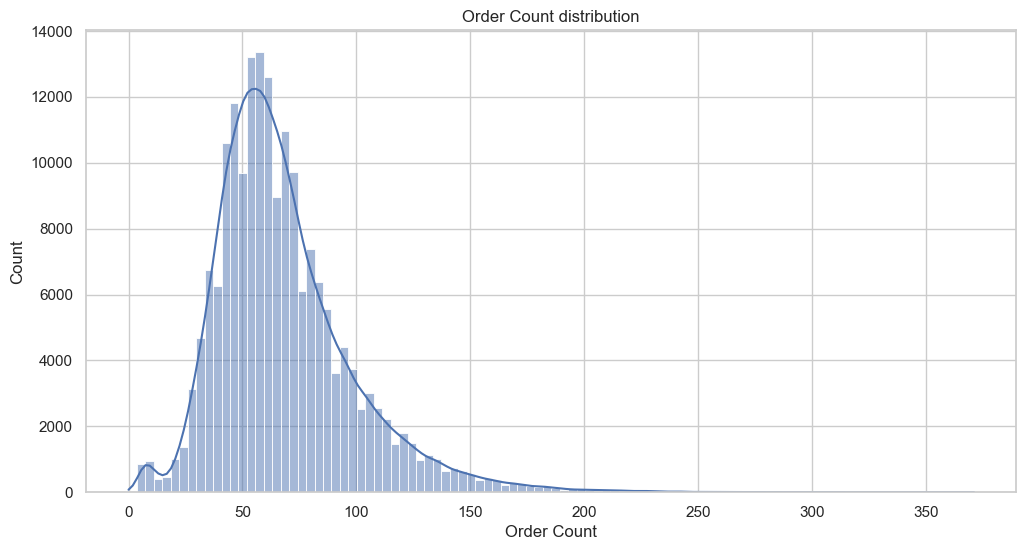

In [12]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Orders', bins=100, kde=True);
plt.title('Order Count distribution');
plt.xlabel('Order Count');

<b style='padding: 4px 10px 6px 10px;border-radius: 5px;background: #009688;color: #fff;display: inline-block;'>Observations</b>
- We can see that most of the order count for each store is around 50 - 80

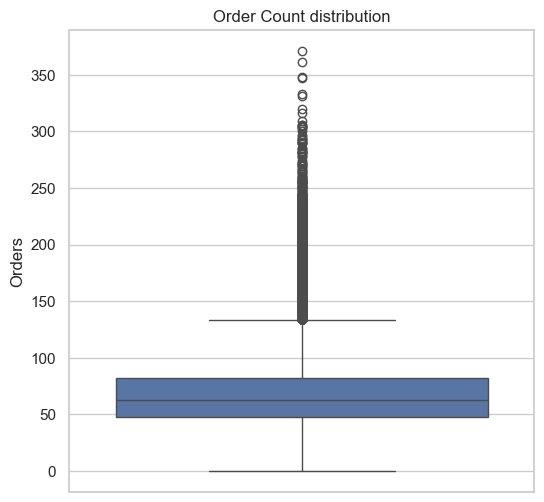

In [13]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=df, y='Orders');
plt.title('Order Count distribution');

<b style='padding: 4px 10px 6px 10px;border-radius: 5px;background: #009688;color: #fff;display: inline-block;'>Observations</b>

- We can see that most of the order count for each store is around 50 - 80

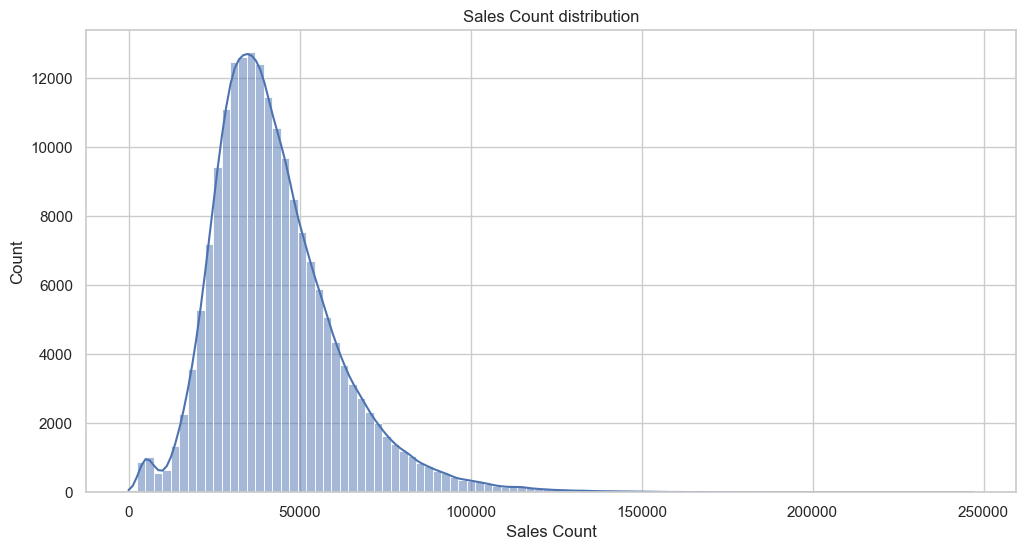

In [23]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Sales', bins=100, kde=True);
plt.title('Sales Count distribution');
plt.xlabel('Sales Count');

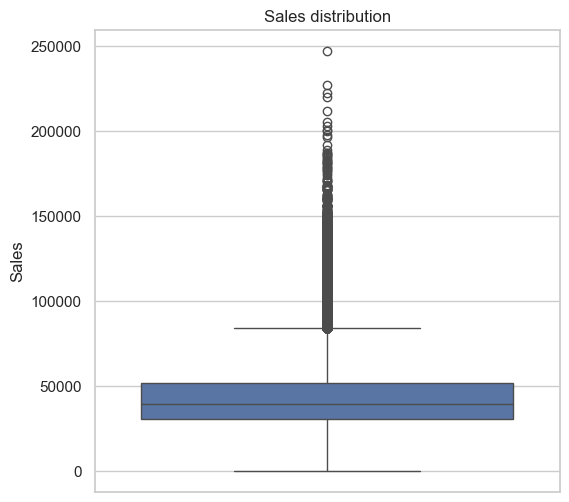

In [33]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=df, y='Sales');
plt.title('Sales distribution');

# Bivariate Analysis

## Sales

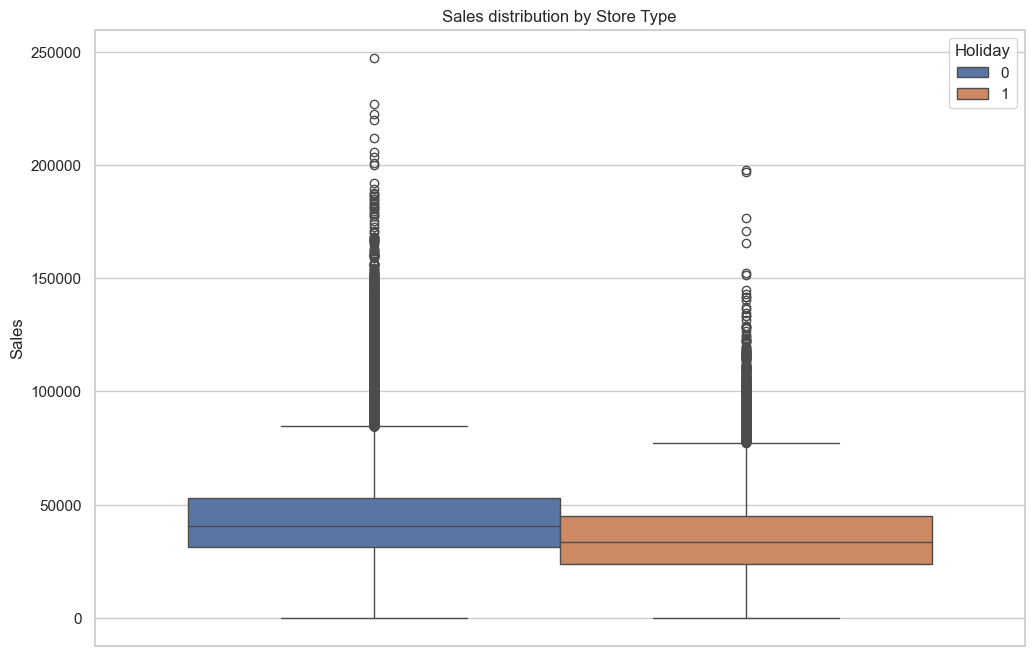

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, y='Sales',  hue='Holiday');
plt.title('Sales distribution by Holiday Type');

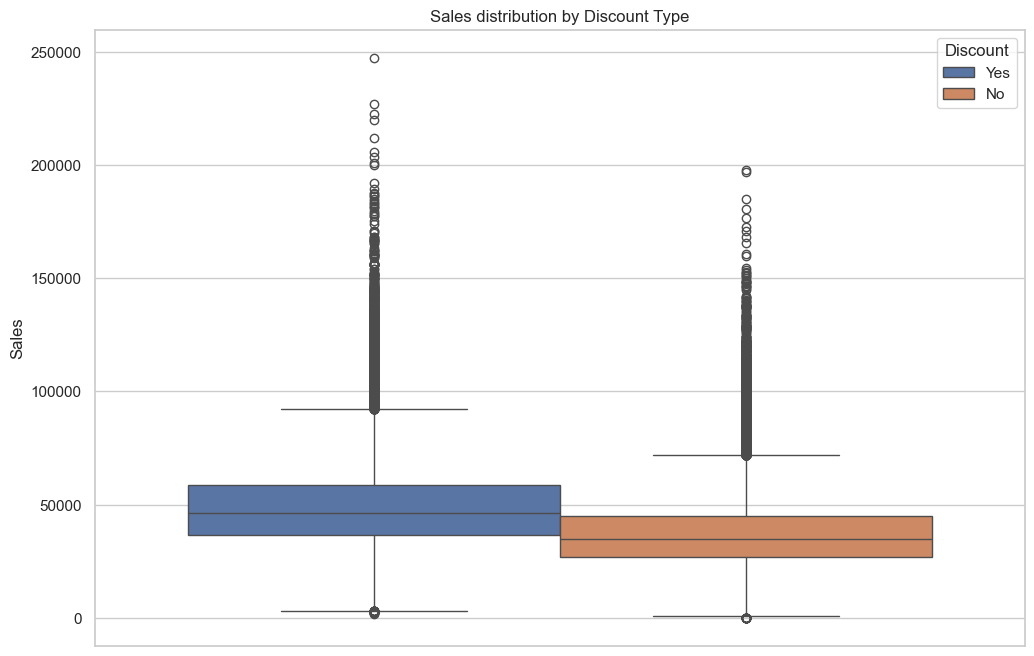

In [7]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, y='Sales',  hue='Discount');
plt.title('Sales distribution by Discount Type');

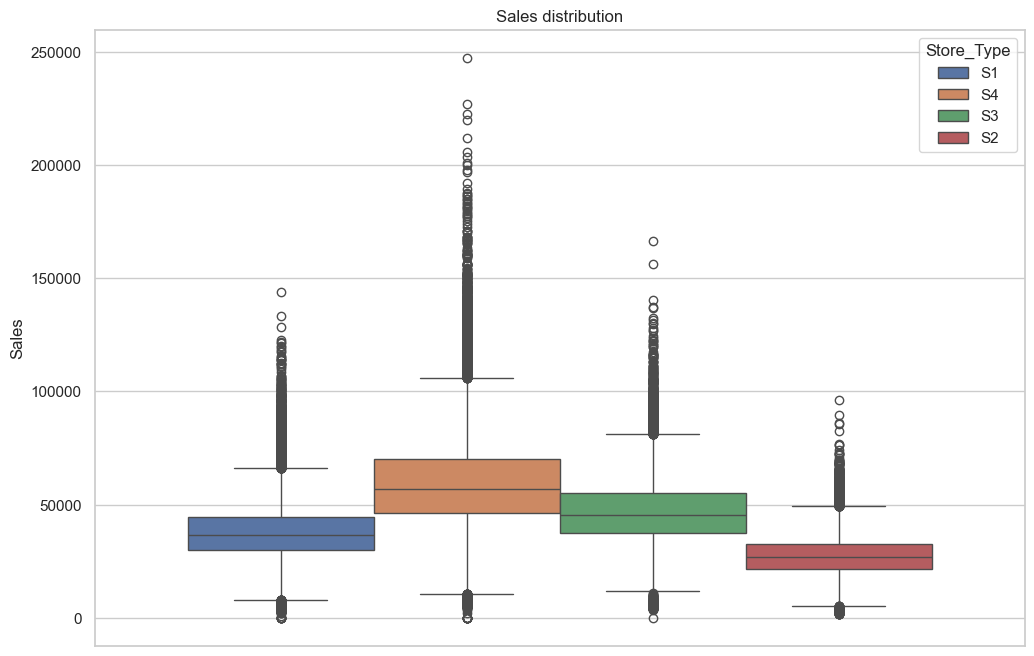

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, y='Sales',  hue='Store_Type');
plt.title('Sales distribution by Store Type');

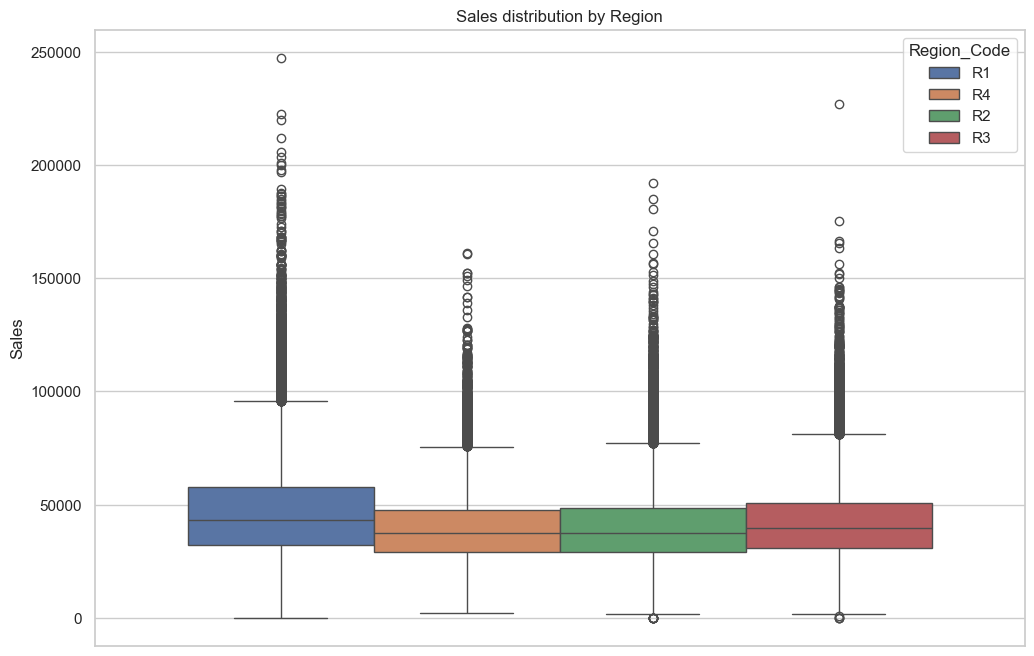

In [35]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, y='Sales',  hue='Region_Code');
plt.title('Sales distribution by Region');

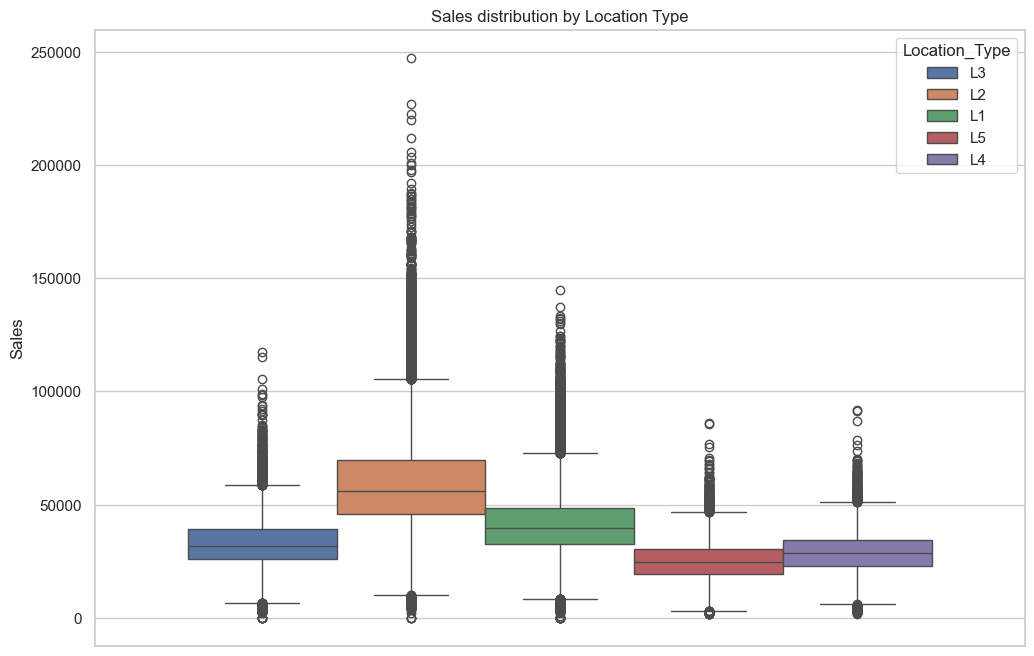

In [36]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, y='Sales',  hue='Location_Type');
plt.title('Sales distribution by Location Type');

<b style='padding: 4px 10px 6px 10px;border-radius: 5px;background: #009688;color: #fff;display: inline-block;'>Observations</b>
- Location type L2 has the higher number of sales compared to other location types
- Location type L5 has the lowest number of sales

## Order Count

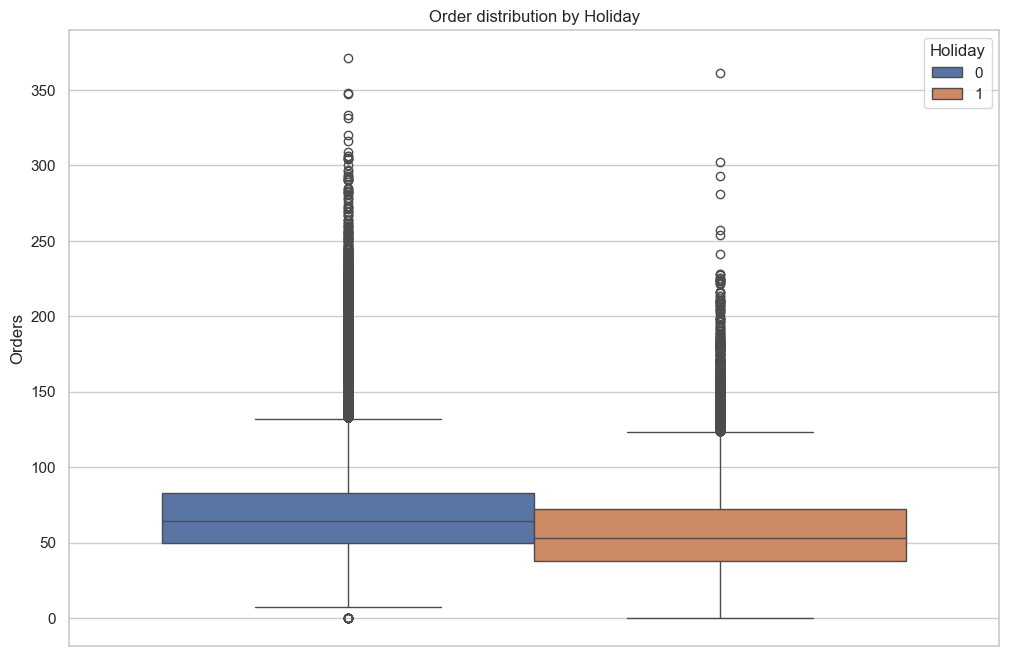

In [14]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, y='Orders',  hue='Holiday');
plt.title('Order distribution by Holiday');

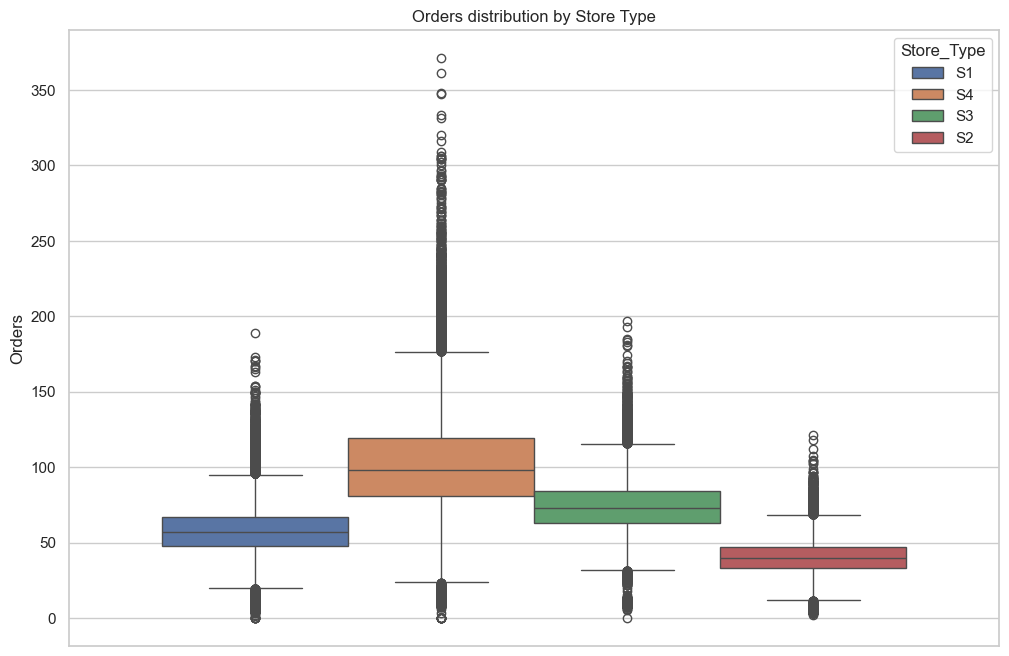

In [16]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, y='Orders',  hue='Store_Type');
plt.title('Orders distribution by Store Type');

<b style='padding: 4px 10px 6px 10px;border-radius: 5px;background: #009688;color: #fff;display: inline-block;'>Observations</b>
- Store type 4 has higher sales and orders as compared to others
- Store type 2 has the lowest sales and orders

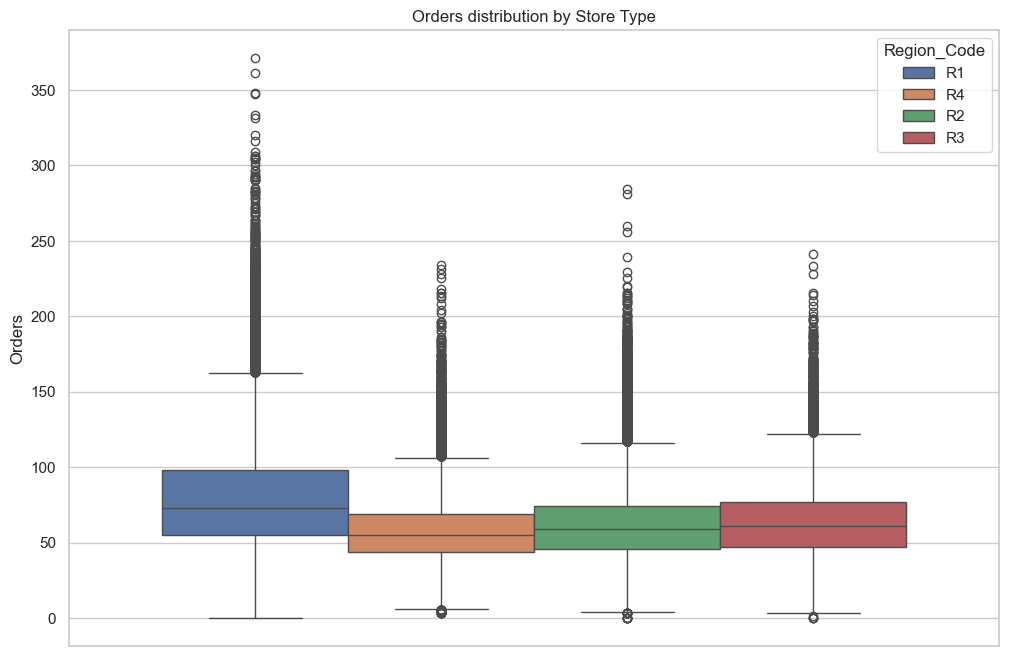

In [17]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, y='Orders',  hue='Region_Code');
plt.title('Orders distribution by Store Type');

<b style='padding: 4px 10px 6px 10px;border-radius: 5px;background: #009688;color: #fff;display: inline-block;'>Observations</b>
- Region R1 has the highest number of sales and orders
- Region R4 has the lowest number of sales and orders 

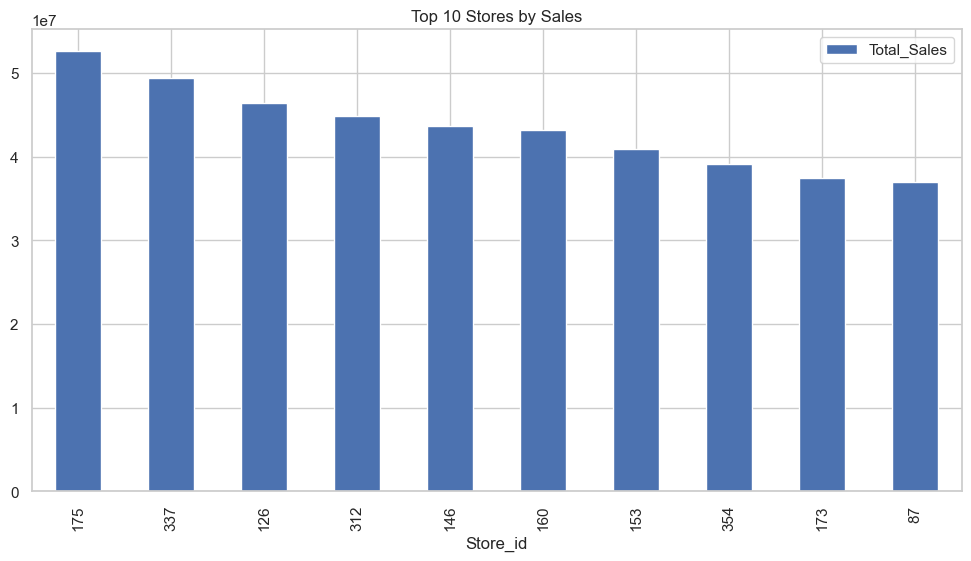

In [18]:
db.sql("""
    select Store_id, round(sum(Sales),0) as Total_Sales, sum(Orders) as Total_Orders from df group by Store_id order by Total_Sales desc limit 10
""").df().plot(kind='bar', x='Store_id', y='Total_Sales', figsize=(12, 6), title='Top 10 Stores by Sales');

┌─────────────┬─────────────┐
│ Region_Code │ store_count │
│   varchar   │    int64    │
├─────────────┼─────────────┤
│ R1          │         124 │
│ R2          │         105 │
│ R3          │          86 │
│ R4          │          50 │
└─────────────┴─────────────┘



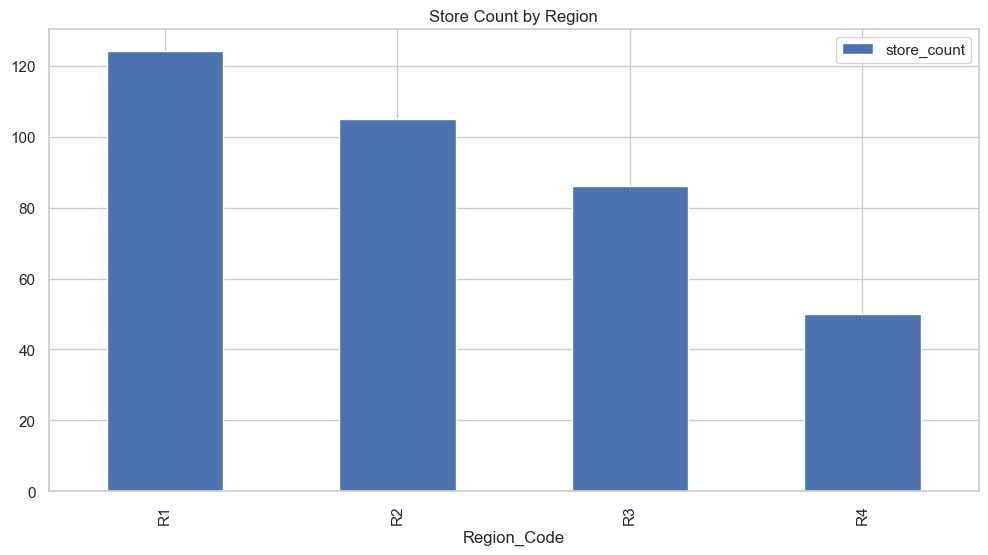

In [16]:
_=db.sql("""
       select 
         distinct Region_Code
         , count(distinct store_id) as store_count,
       from df
         group by 1
       order by 2 desc
""")
print(_)
_.df().plot(kind='bar', x='Region_Code', y='store_count', figsize=(12, 6), title='Store Count by Region');

<b style='padding: 4px 10px 6px 10px;border-radius: 5px;background: #009688;color: #fff;display: inline-block;'>Observations</b>
- There are 124 stores in R1 region, 105 in R2, 86 in R3 and 50 stores in R4 region

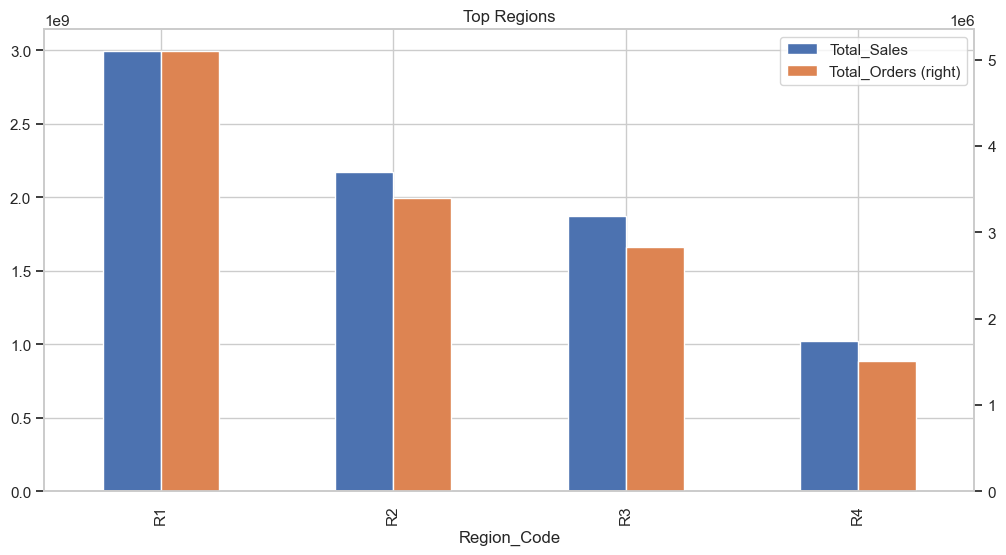

In [19]:
db.sql("""
    select Region_Code, round(sum(Sales),0) as Total_Sales, sum(Orders) as Total_Orders from df group by Region_Code order by Total_Sales desc
""").df().plot(kind='bar', x='Region_Code', y=['Total_Sales', 'Total_Orders'], figsize=(12, 6), title='Top Regions', secondary_y='Total_Orders');

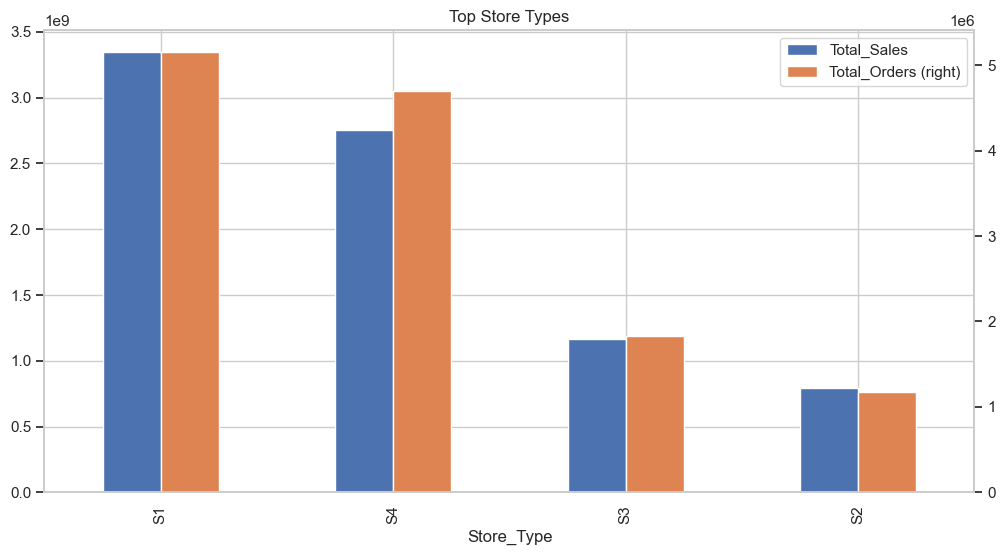

In [47]:
db.sql("""
    select Store_Type, round(sum(Sales),0) as Total_Sales, sum("Order") as Total_Orders from df group by Store_Type order by Total_Sales desc
""").df().plot(kind='bar', x='Store_Type', y=['Total_Sales', 'Total_Orders'], figsize=(12, 6), title='Top Store Types', secondary_y='Total_Orders');

In [56]:
db.sql(""" 
select distinct weekday(Date), Day_of_week as Month from df order by weekday(Date)
""")

┌───────────────┬───────────┐
│ weekday(Date) │   Month   │
│     int64     │  varchar  │
├───────────────┼───────────┤
│             0 │ Sunday    │
│             1 │ Monday    │
│             2 │ Tuesday   │
│             3 │ Wednesday │
│             4 │ Thursday  │
│             5 │ Friday    │
│             6 │ Saturday  │
└───────────────┴───────────┘

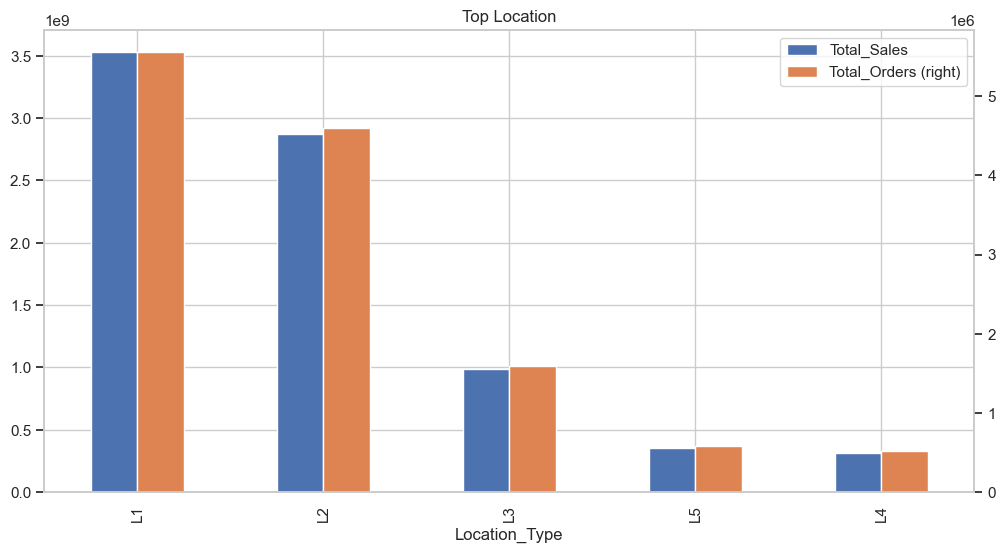

In [20]:
db.sql("""
    select Location_Type, round(sum(Sales),0) as Total_Sales, sum(Orders) as Total_Orders from df group by Location_Type order by Total_Sales desc
""").df().plot(kind='bar', x='Location_Type', y=['Total_Sales', 'Total_Orders'], figsize=(12, 6), title='Top Location', secondary_y='Total_Orders');

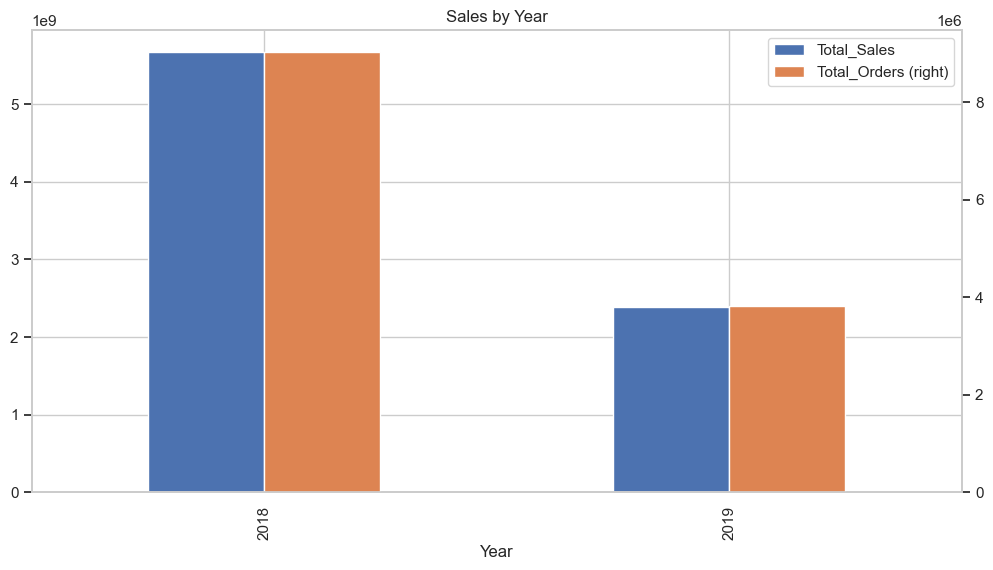

In [21]:
db.sql("""
    select Year, round(sum(Sales),0) as Total_Sales, sum(Orders) as Total_Orders from df group by Year order by Year
""").df().plot(kind='bar', x='Year', y=['Total_Sales', 'Total_Orders'], figsize=(12, 6), title='Sales by Year', secondary_y='Total_Orders');

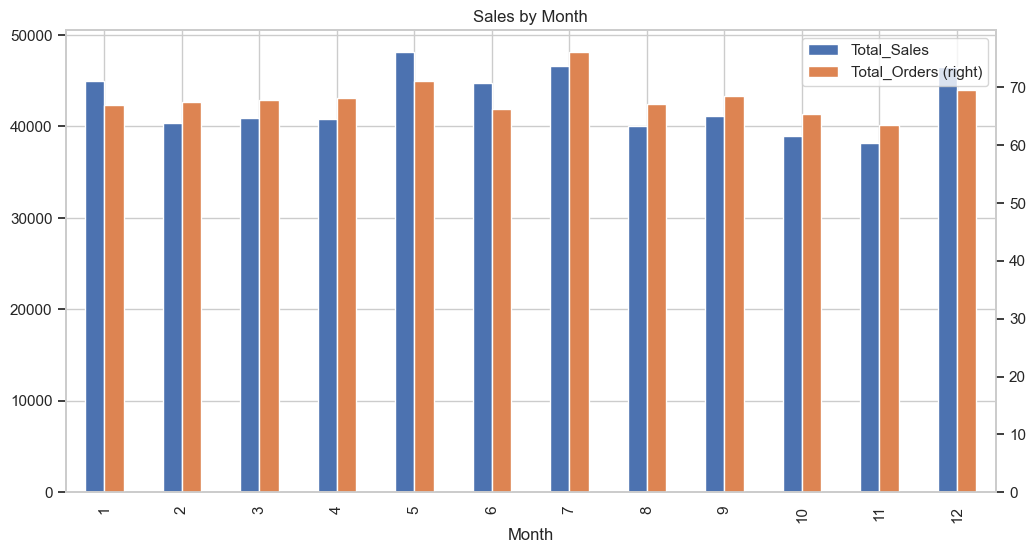

In [22]:
db.sql("""
    select Month, round(avg(Sales),0) as Total_Sales, avg(Orders) as Total_Orders from df group by Month, month(Date) order by month(Date)
""").df().plot(kind='bar', x='Month', y=['Total_Sales', 'Total_Orders'], figsize=(12, 6), title='Sales by Month', secondary_y='Total_Orders');

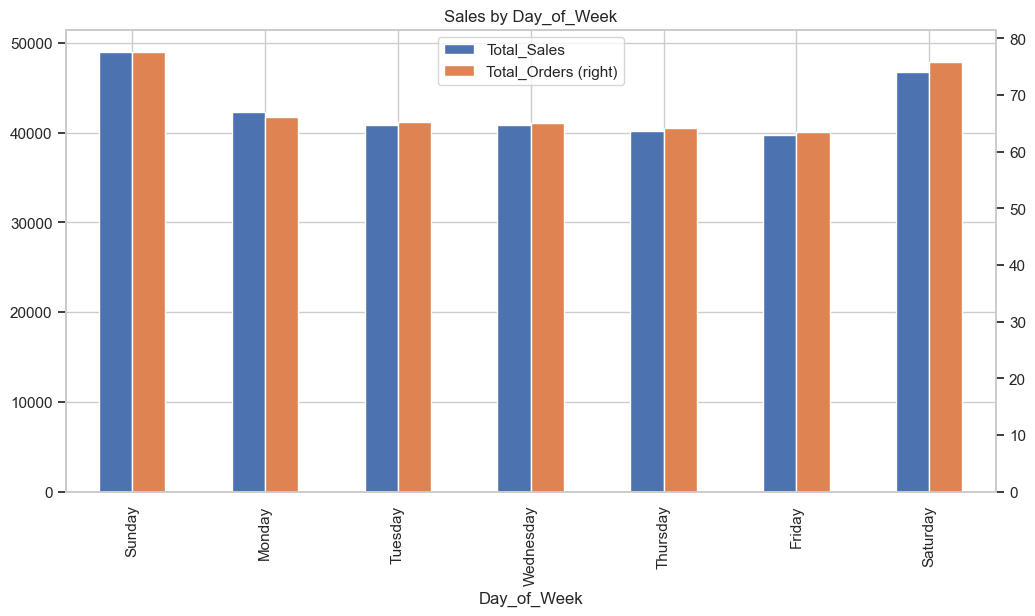

In [23]:
db.sql("""
    select Day_of_Week, round(avg(Sales),0) as Total_Sales, avg(Orders) as Total_Orders from df group by Day_of_Week,weekday(Date)  order by weekday(Date)
""").df().plot(kind='bar', x='Day_of_Week', y=['Total_Sales', 'Total_Orders'], figsize=(12, 6), title='Sales by Day_of_Week', secondary_y='Total_Orders');

**Daily Sales Analysis Per Week**

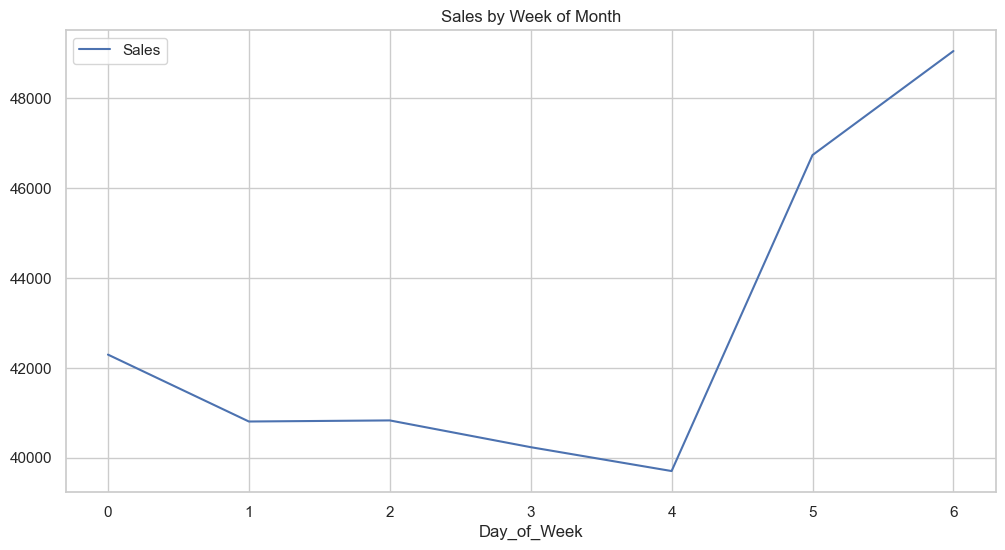

In [38]:
df.groupby("Day_of_Week").agg({"Sales": "mean"}).plot(kind='line', figsize=(12, 6), title='Sales by Week of Month');

<b style='padding: 4px 10px 6px 10px;border-radius: 5px;background: #009688;color: #fff;display: inline-block;'>Observations</b>

- Sales are highest during Saturday and Sunday

**Weekly Sales Analysis Per Month**

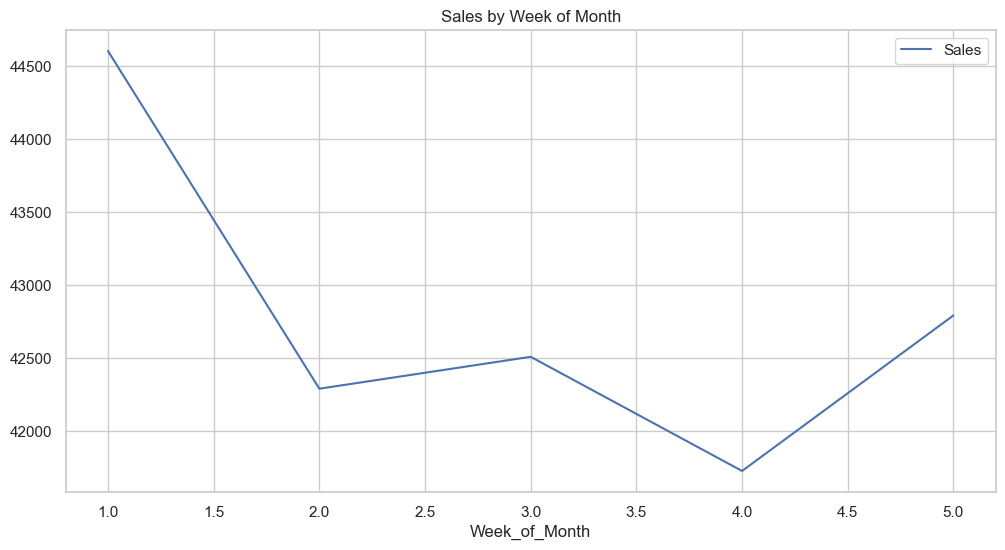

In [9]:
df.groupby("Week_of_Month").agg({"Sales": "mean"}).plot(kind='line', figsize=(12, 6), title='Sales by Week of Month');

<b style='padding: 4px 10px 6px 10px;border-radius: 5px;background: #009688;color: #fff;display: inline-block;'>Observations</b>
- There is higher number of sales during the first week of the month
- There is a slight increase in sales during the last week of the month
- The sales is lowest during the 4th week of the month

**Monthly Sales Analysis Per Year**

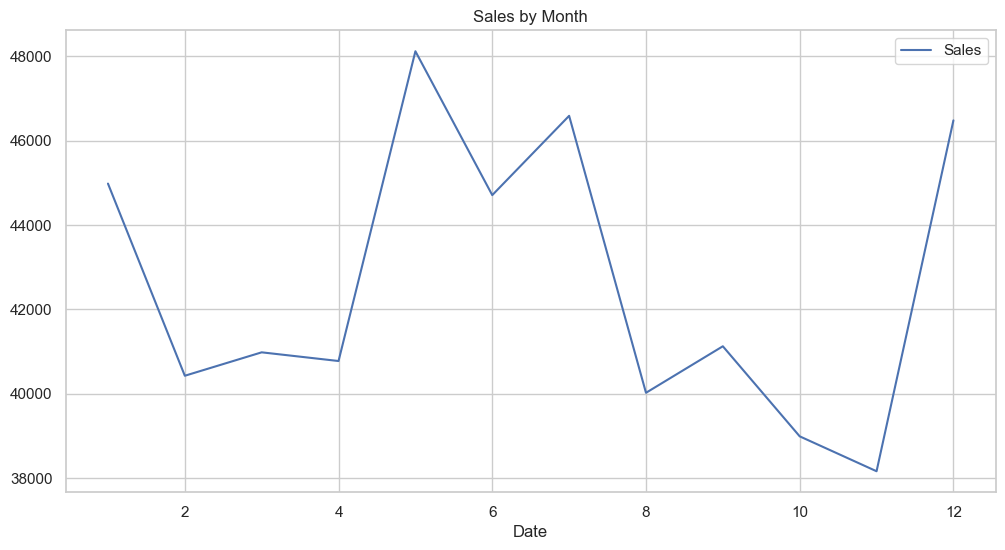

In [24]:
df.groupby(df["Date"].dt.month).agg({"Sales": "mean"}).plot(kind='line', figsize=(12, 6), title='Sales by Month');

<b style='padding: 4px 10px 6px 10px;border-radius: 5px;background: #009688;color: #fff;display: inline-block;'>Observations</b>

- The sales is highest during the month of May July, December and January

**Daily Sales Analysis Per Month**

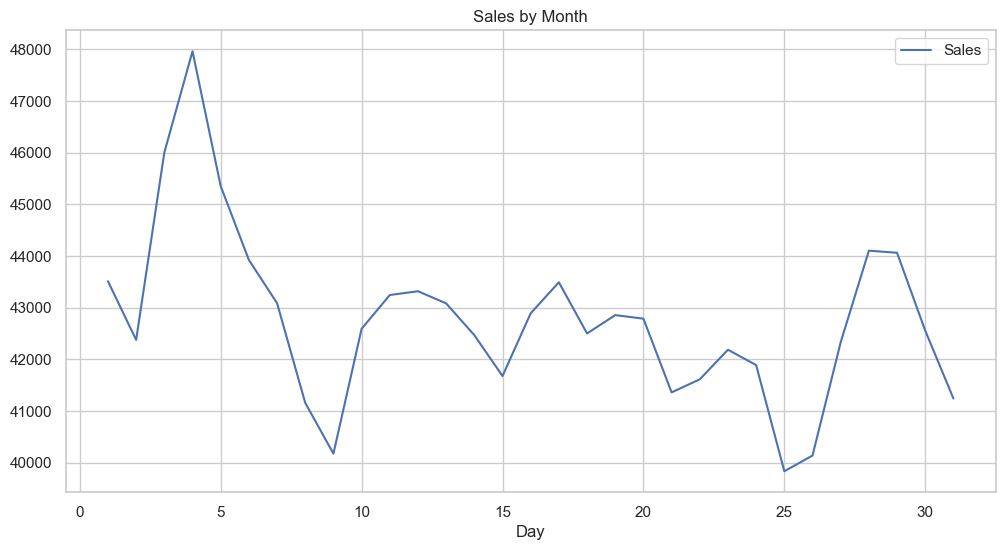

In [55]:
df.groupby("Day").agg({"Sales": "mean"}).plot(kind='line', figsize=(12, 6), title='Sales by Month');

<b style='padding: 4px 10px 6px 10px;border-radius: 5px;background: #009688;color: #fff;display: inline-block;'>Observations</b>
- There is high number of sales during the 5 days of the month